In [295]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [296]:
df = pd.read_csv('vehicle.csv')

In [297]:
df.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

# EDA and Preprocessing


In [298]:
df['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [299]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'van' else ( 2 if x == 'car' else 3 ))

1==Van

2==car

3==bus

# Missing Values and Treatment.


In [300]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

# There are missing values existing in the dataset. 

- We are filling the NaN values by default with mean w.r.t the column.

In [301]:
df = df.apply(lambda x: x.fillna(x.mean()))

In [161]:
#  This is the manual way of Handling Missing value for one feature.

# df['circularity'].unique() 
# df['circularity'].fillna(df['circularity'].mean(), axis = 0, inplace = True)
# df['circularity'].unique()

In [302]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

# Outlier Handling for various features and treatment

In [304]:
df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.828775    6.133943   33.0   40.00   
distance_circularity         846.0   82.110451   15.740902   40.0   70.00   
radius_ratio                 846.0  168.888095   33.400979  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.678910    7.882119   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.901775   33.195188  112.0  147.00   
elongatedness                846.0   40.933728    7.811559   26.0   33.00   
pr.axis_rectangularity       846.0   20.582444    2.588326   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.631079   31.355195  130.0  167.00   
scaled_variance.1            846.0  439.494076  176.457706  184.0  318.25   
scaled_radius_of_gyration    846.0  174.709716   32.546223  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.447743    7.468450   59.0   67.00   
skewness_about               846.0    6.364286    4.903148    0.0    2.00   
skewness_about.1             846.0   12.602367    8.930792    0.0    5.00   
skewness_about.2             846.0  188.919527    6.152166  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    2.022459    0.702130    1.0    2.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 168.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            364.0  586.75  1018.0  
scaled_radius_of_gyration    174.0  198.00   268.0  
scaled_radius_of_gyration.1   72.0   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          2.0    3.00     3.0

# Let us visualize the Outliers through boxplot

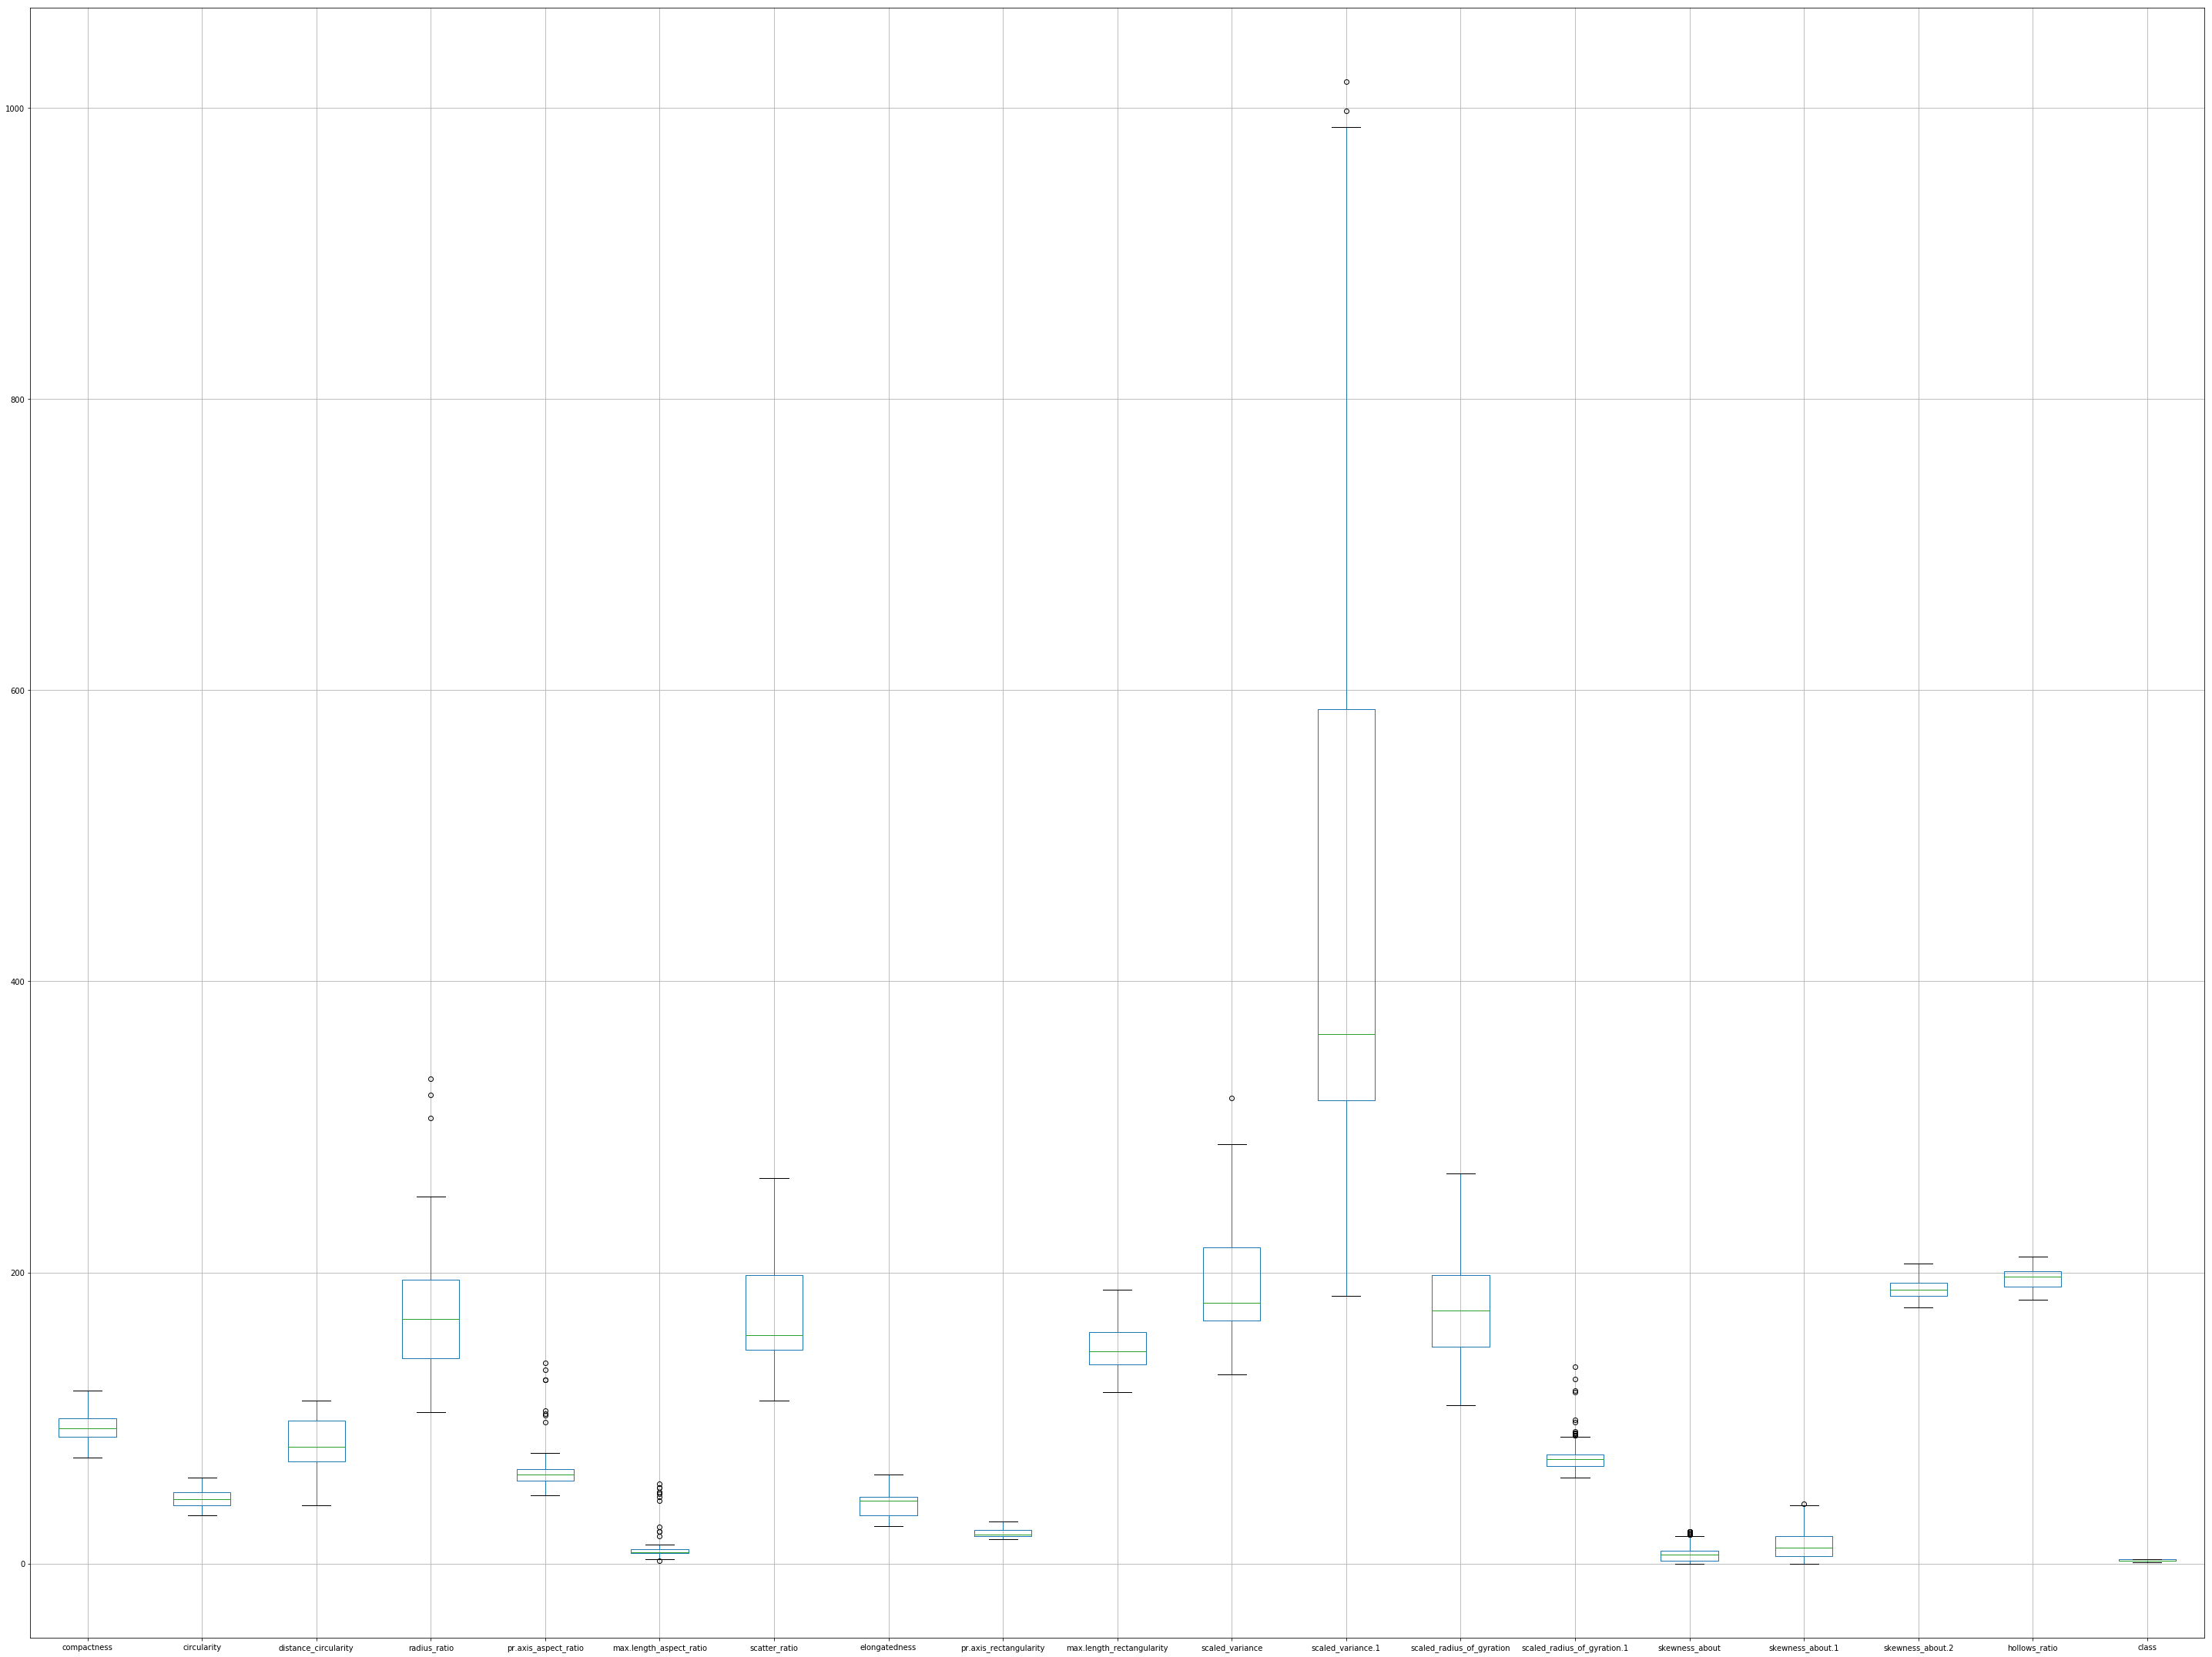

In [70]:
df.boxplot(figsize=(40,30))
plt.tight_layout()
plt.show()

# Observations:

1- Outlier existing for following features: > 

- radius ratio

- pr.axis_aspect_ratio

- max.length_aspect_ratio

- scaled_variance

- scaled_variance.1

- scaled_radius_of_gyration

- skewness_about

- skewness_about.1

2- We will replace outliers with the mean for the data points which are outside 3 Std for that feature.

4- After Replacing the outliers we will verify if the existing dataset column pass statistical 2SampleTtest to support that we are modifying the actual dataset too much that distribution changes from original sample.

3- We will then again visualize if the outliers are visible or not.

Visualize dist plot for radius ratio and then handle the outliers

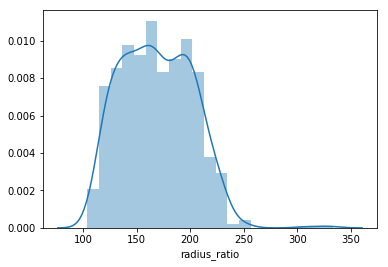

In [306]:
sns.distplot(df['radius_ratio']) # Long tails are visible clearly. 


- let us make the copy of the feature to verify 2sampleTTest if this makes any different post outlier handling


In [307]:
df['radius_ratio_new'] = df['radius_ratio'].copy()

In [308]:
# Mean before Outlier Handling.
df['radius_ratio'].mean()

168.88809523809525

In [309]:
# Outlier handling

mean = df['radius_ratio_new'].mean(skipna = True)
print ('Mean for radius_ratio_new is {} '.format(mean))
df['radius_ratio_new'] = np.where((df['radius_ratio_new'] - mean).abs() > (3*df['radius_ratio_new'].std()),mean,df['radius_ratio_new'])

Mean for radius_ratio_new is 168.88809523809525 


In [311]:
# Mean post Outlier handling
df['radius_ratio_new'].mean()

168.3510553866937

# 2 Sample TTest on the modified columns to verify if we handle outliers through fill of mean it still remains from the  same process. 

- From this conclusion we can make the inference that radius ratio can be modified with outlier handling.
- We can do the similar for the other feats also but here I wanted to show on one sample only.

In [312]:
from scipy.stats import ttest_ind

stat, pvalue = ttest_ind(df['radius_ratio'] , df['radius_ratio_new'])
print("compare means", df['radius_ratio_new'].mean() ,  df['radius_ratio'].mean())
print("Tstatistic , Pvalue", stat, pvalue)

if pvalue < 0.05:
	print('Samples are likely drawn from different distributions (reject H0)')
else:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')

compare means 168.3510553866937 168.88809523809525
Tstatistic , Pvalue 0.33694859073771244 0.736197492854811
Samples are likely drawn from the same distributions (fail to reject H0)


In [314]:
mean = df['radius_ratio'].mean(skipna = True)
print ('Mean for radius_ratio is {} '.format(mean))
df['radius_ratio'] = np.where((df['radius_ratio'] - mean).abs() > (3*df['radius_ratio'].std()),mean,df['radius_ratio'])

Mean for radius_ratio is 168.88809523809525 


In [319]:
df.drop(columns=['radius_ratio_new'], inplace= True) # Dropping the extra col which was created for 2 Sample TTest

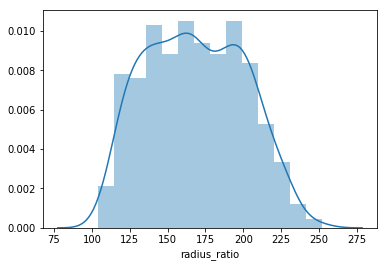

In [320]:
sns.distplot(df['radius_ratio']) # No More long tales and centered around mean. However ther is small cluster visible . let us explore this later in pairplot

- we will implement the outlier handling together in one cell for the rest of features here

In [316]:
mean = df['pr.axis_aspect_ratio'].mean(skipna = True)
print ('Mean for pr.axis_aspect_ratio is {} '.format(mean))
df['pr.axis_aspect_ratio'] = np.where((df['pr.axis_aspect_ratio'] - mean).abs() > (3*df['pr.axis_aspect_ratio'].std()),mean,df['pr.axis_aspect_ratio'])


mean = df['max.length_aspect_ratio'].mean(skipna = True)
print ('Mean for max.length_aspect_ratio is {} '.format(mean))
df['max.length_aspect_ratio'] = np.where((df['max.length_aspect_ratio'] - mean).abs() > (3*df['max.length_aspect_ratio'].std()),mean,df['max.length_aspect_ratio'])

mean = df['scaled_variance'].mean(skipna = True)
print ('Mean for scaled_variance is {} '.format(mean))
df['scaled_variance'] = np.where((df['scaled_variance'] - mean).abs() > (3*df['scaled_variance'].std()),mean,df['scaled_variance'])

mean = df['scaled_variance.1'].mean(skipna = True)
print ('Mean for scaled_variance.1 is {} '.format(mean))
df['scaled_variance.1'] = np.where((df['scaled_variance.1'] - mean).abs() > (3*df['scaled_variance.1'].std()),mean,df['scaled_variance.1'])

mean = df['scaled_radius_of_gyration'].mean(skipna = True)
print ('Mean for scaled_radius_of_gyration is {} '.format(mean))
df['scaled_radius_of_gyration'] = np.where((df['scaled_radius_of_gyration'] - mean).abs() > (3*df['scaled_radius_of_gyration'].std()),mean,df['scaled_radius_of_gyration'])

mean = df['skewness_about'].mean(skipna = True)
print ('Mean for skewness_about is {} '.format(mean))
df['skewness_about'] = np.where((df['skewness_about'] - mean).abs() > (3*df['skewness_about'].std()),mean,df['skewness_about'])

mean = df['skewness_about.1'].mean(skipna = True)
print ('Mean for skewness_about.1 is {} '.format(mean))
df['skewness_about.1'] = np.where((df['skewness_about.1'] - mean).abs() > (3*df['skewness_about.1'].std()),mean,df['skewness_about.1'])


Mean for pr.axis_aspect_ratio is 61.67890995260664 
Mean for max.length_aspect_ratio is 8.567375886524824 
Mean for scaled_variance is 188.63107947805457 
Mean for scaled_variance.1 is 439.4940758293839 
Mean for scaled_radius_of_gyration is 174.7097156398104 
Mean for skewness_about is 6.364285714285713 
Mean for skewness_about.1 is 12.602366863905326 


In [317]:
df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.828775    6.133943   33.0   40.00   
distance_circularity         846.0   82.110451   15.740902   40.0   70.00   
radius_ratio                 846.0  168.351055   32.147659  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.162871    5.613716   47.0   57.00   
max.length_aspect_ratio      846.0    8.163246    2.213822    2.0    7.00   
scatter_ratio                846.0  168.901775   33.195188  112.0  147.00   
elongatedness                846.0   40.933728    7.811559   26.0   33.00   
pr.axis_rectangularity       846.0   20.582444    2.588326   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  187.900331   30.101194  130.0  167.00   
scaled_variance.1            846.0  436.861660  172.226977  184.0  318.25   
scaled_radius_of_gyration    846.0  174.709716   32.546223  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.447743    7.468450   59.0   67.00   
skewness_about               846.0    6.290358    4.783107    0.0    2.00   
skewness_about.1             846.0   12.536415    8.826779    0.0    5.00   
skewness_about.2             846.0  188.919527    6.152166  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    2.022459    0.702130    1.0    2.00   
radius_ratio_new             846.0  168.351055   32.147659  104.0  141.00   

                               50%     75%    max  
compactness                   93.0  100.00  119.0  
circularity                   44.0   49.00   59.0  
distance_circularity          80.0   98.00  112.0  
radius_ratio                 168.0  194.75  252.0  
pr.axis_aspect_ratio          61.0   65.00   76.0  
max.length_aspect_ratio        8.0   10.00   22.0  
scatter_ratio                157.0  198.00  265.0  
elongatedness                 43.0   46.00   61.0  
pr.axis_rectangularity        20.0   23.00   29.0  
max.length_rectangularity    146.0  159.00  188.0  
scaled_variance              179.0  216.00  280.0  
scaled_variance.1            364.0  583.75  968.0  
scaled_radius_of_gyration    174.0  198.00  268.0  
scaled_radius_of_gyration.1   72.0   75.00  135.0  
skewness_about                 6.0    9.00   21.0  
skewness_about.1              11.0   19.00   39.0  
skewness_about.2             188.0  193.00  206.0  
hollows_ratio                197.0  201.00  211.0  
class                          2.0    3.00    3.0  
radius_ratio_new             168.0  194.75  252.0

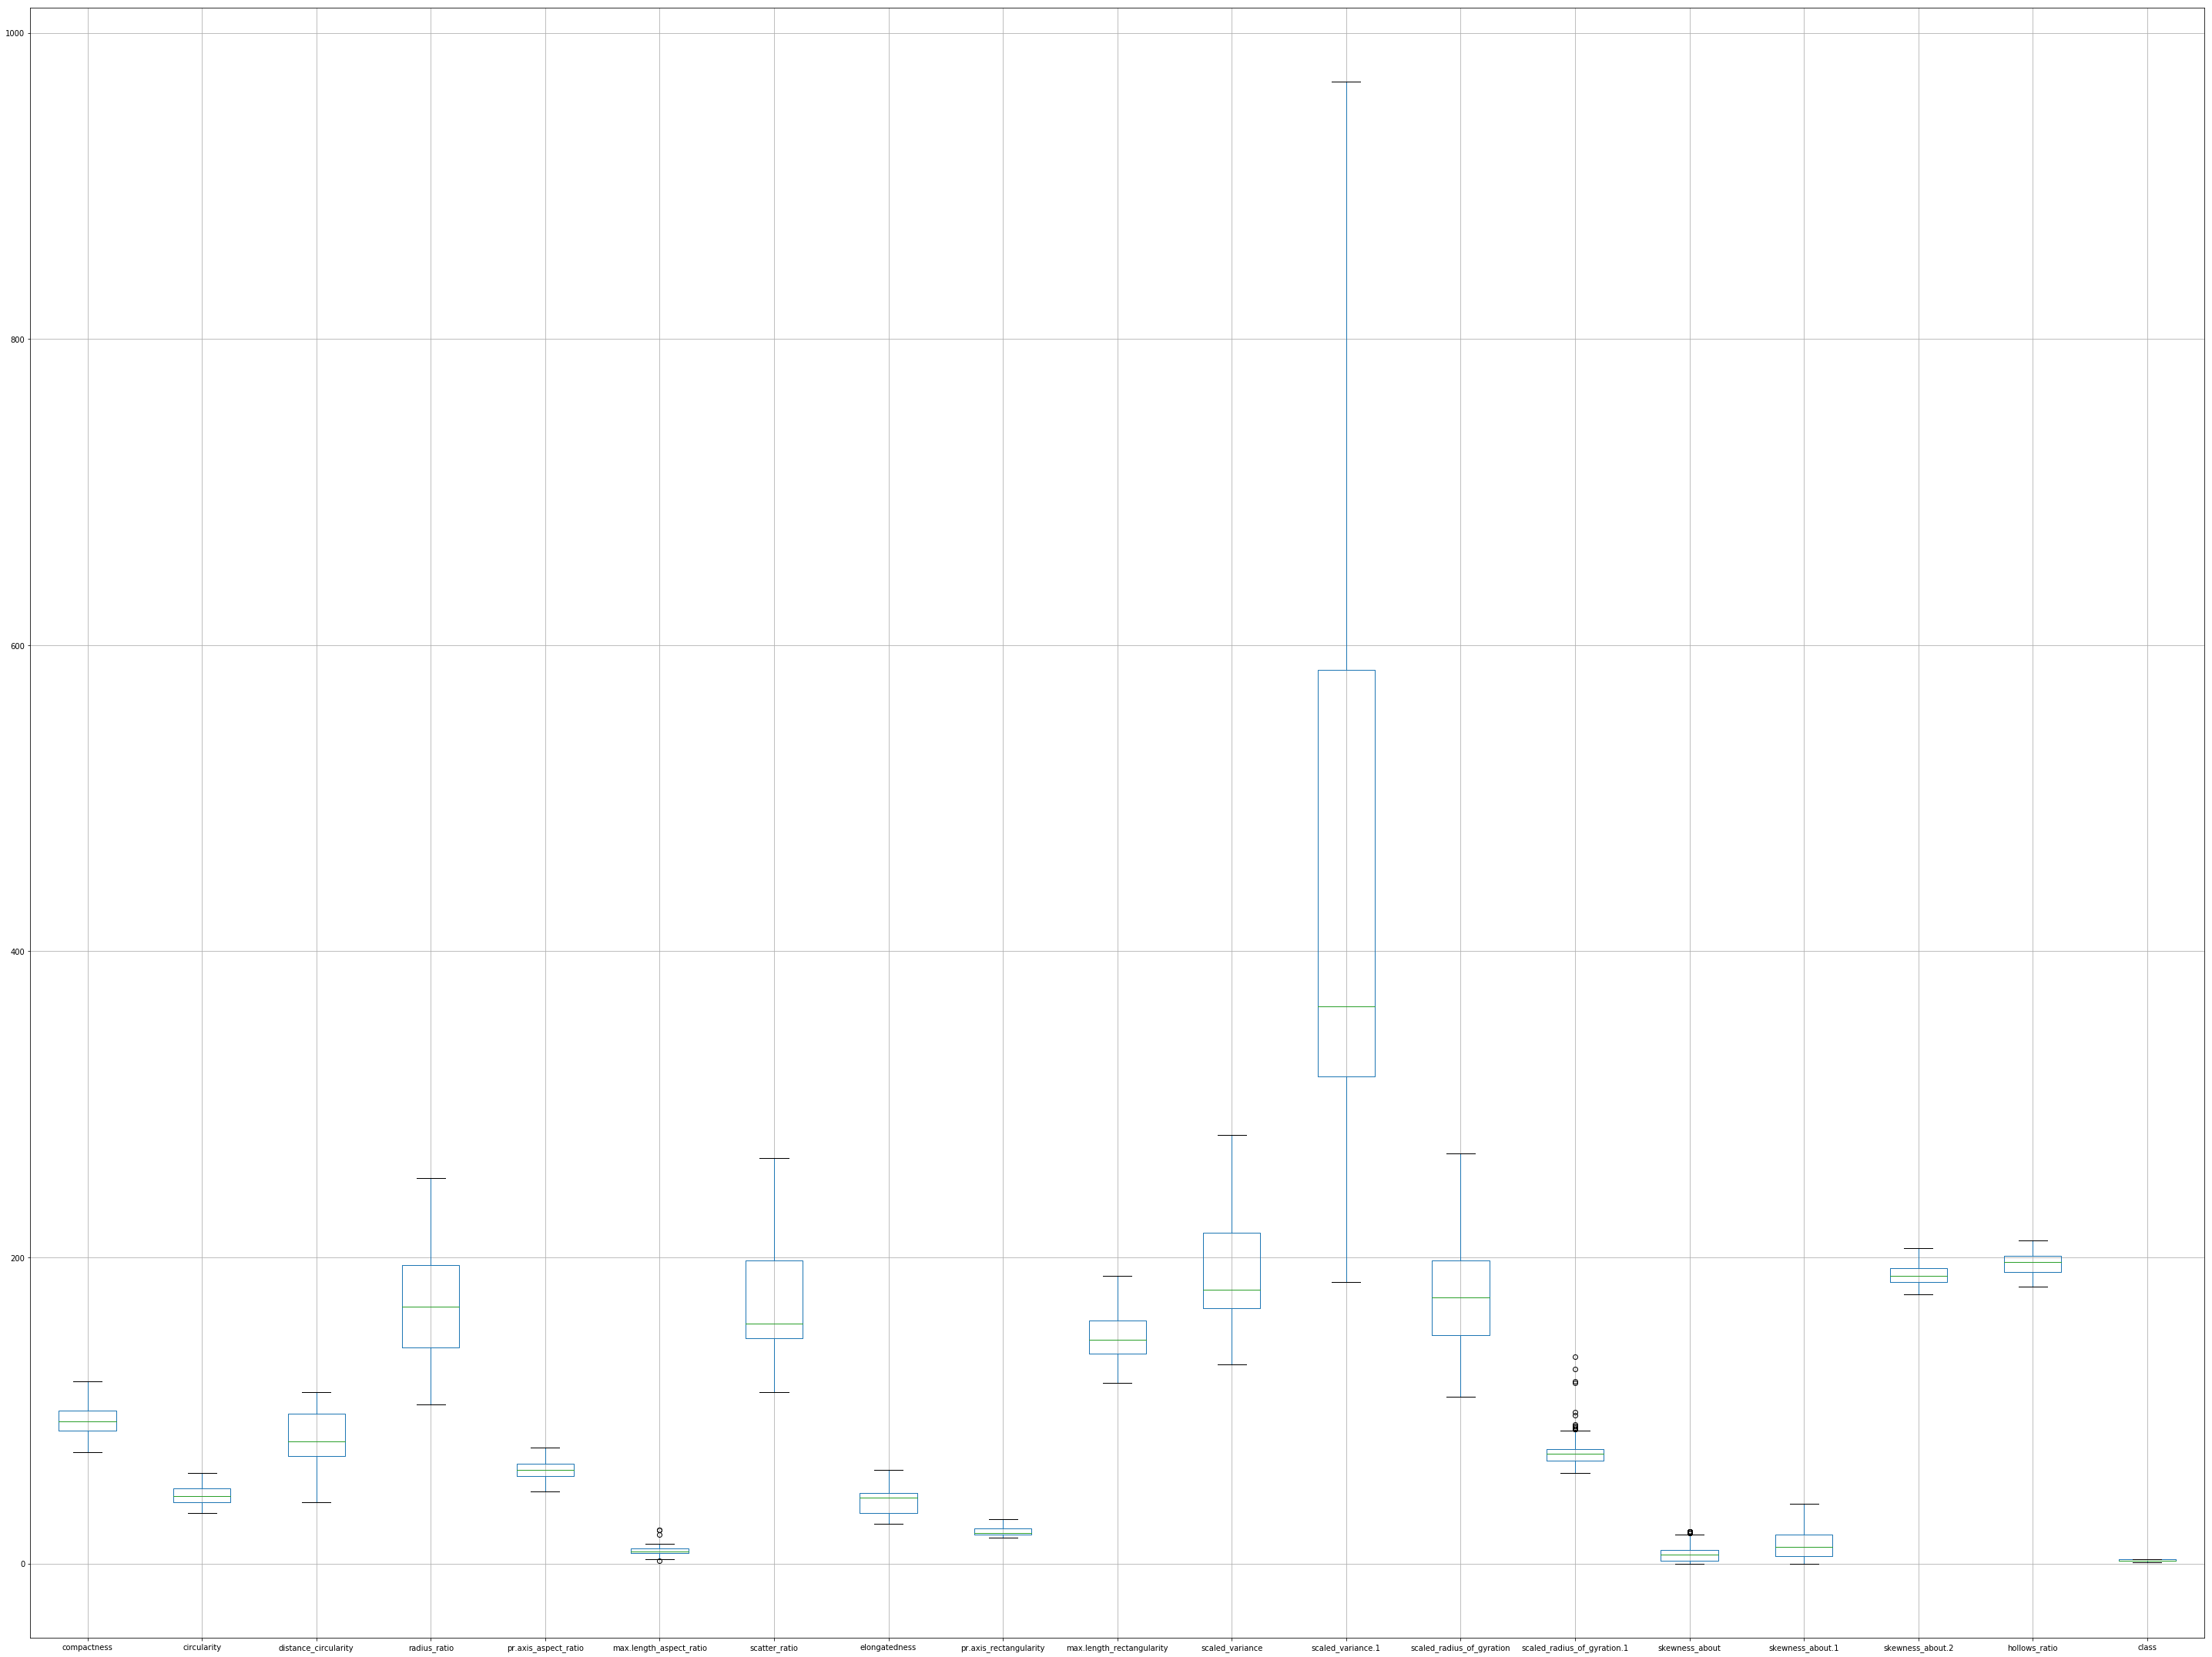

In [107]:
df.boxplot(figsize=(40,30))  # No More outliers in our data set now.
plt.tight_layout()
plt.show()

In [108]:
# Pair Plot Analysis

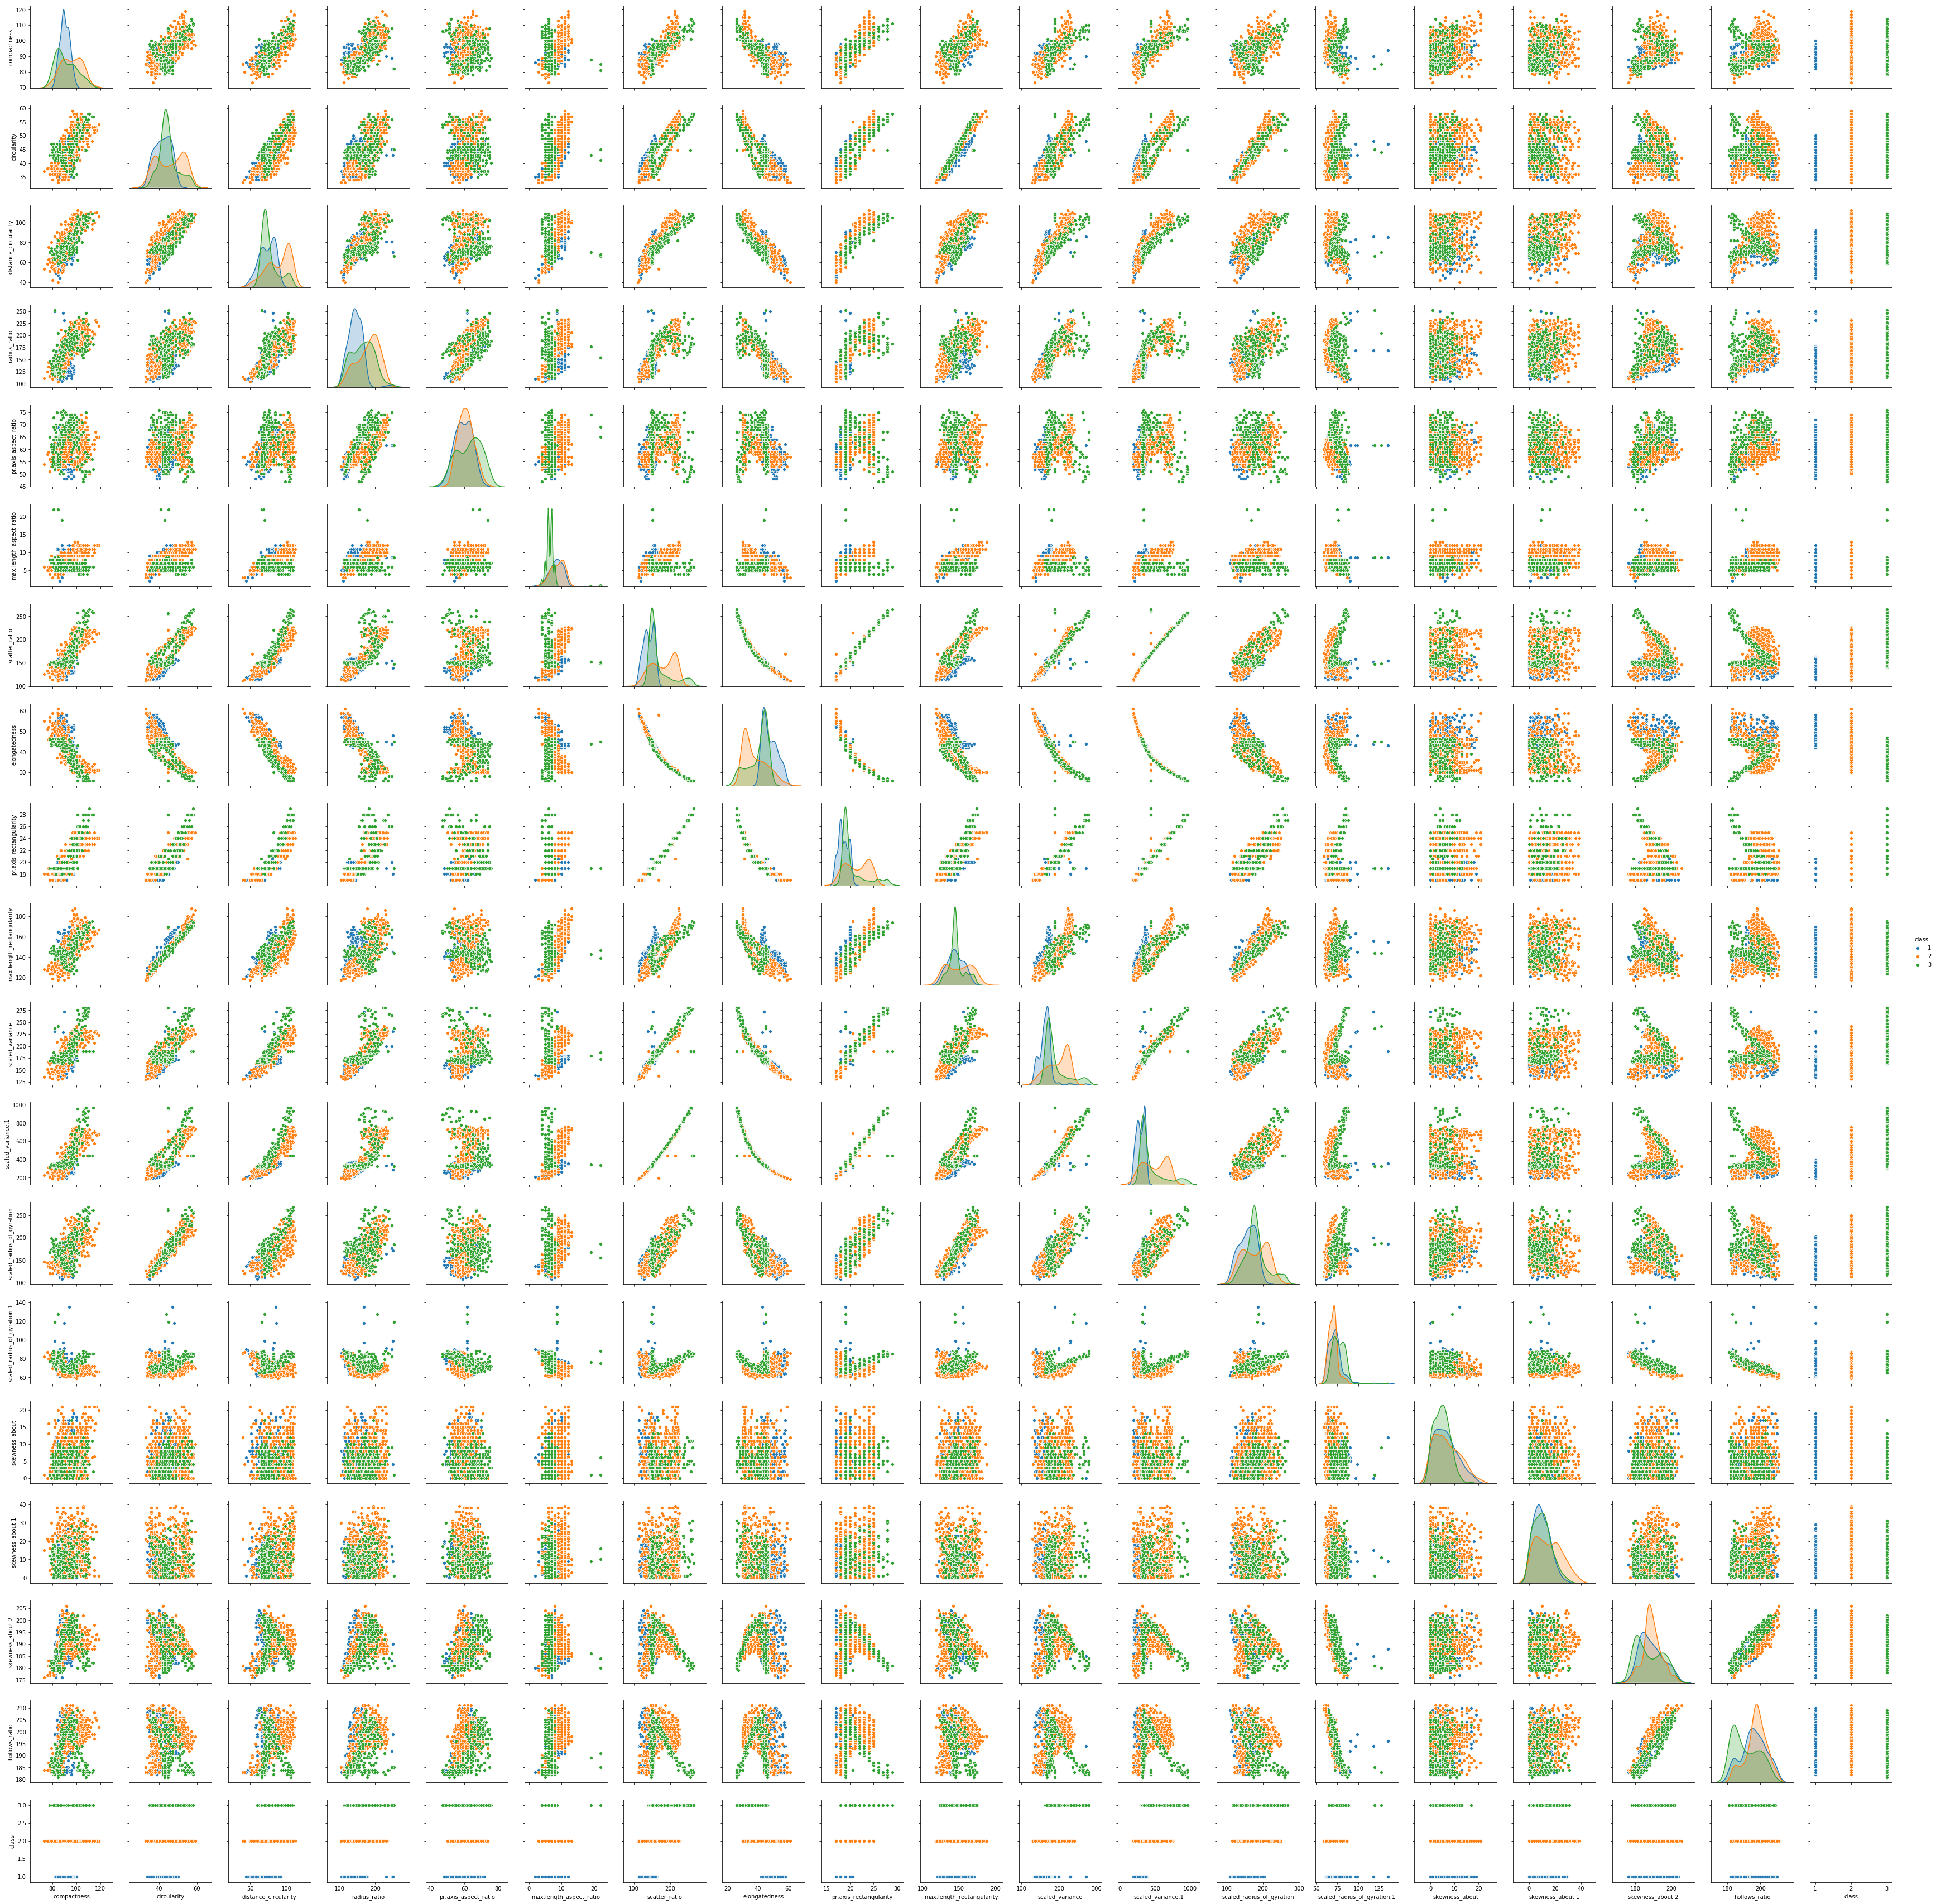

In [109]:
sns.pairplot(df, diag_kind= 'kde', hue = 'class')

In [318]:
df.groupby('class').count()

#1==Van,2==car,3==bus

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
1              199          199                   199           199   
2              429          429                   429           429   
3              218          218                   218           218   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
1                       199                      199            199   
2                       429                      429            429   
3                       218                      218            218   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
1                199                     199                        199   
2                429                     429                        429   
3                218                     218                        218   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
1                  199                199                        199   
2                  429                429                        429   
3                  218                218                        218   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
1                              199             199               199   
2                              429             429               429   
3                              218             218               218   

       skewness_about.2  hollows_ratio  radius_ratio_new  
class                                                     
1                   199            199               199  
2                   429            429               429  
3                   218            218               218

# Observations 

- Looking at the diagnols it is visible that some of the features are very overlapping for car and van hence if we go ahead and conduct ttest on the same our hypthesis will reject that they are from same sample. We are ignoring this at this time since we do not know what is the production Mean for the attributes will look like.


- Some of the features are perfectly collinear with each other hence we have case where PCA can be introduced to help in reducing the dimensions. we will also conduct HeatMap to decide the collinearity among various feats.

<Figure size 1440x1440 with 0 Axes>

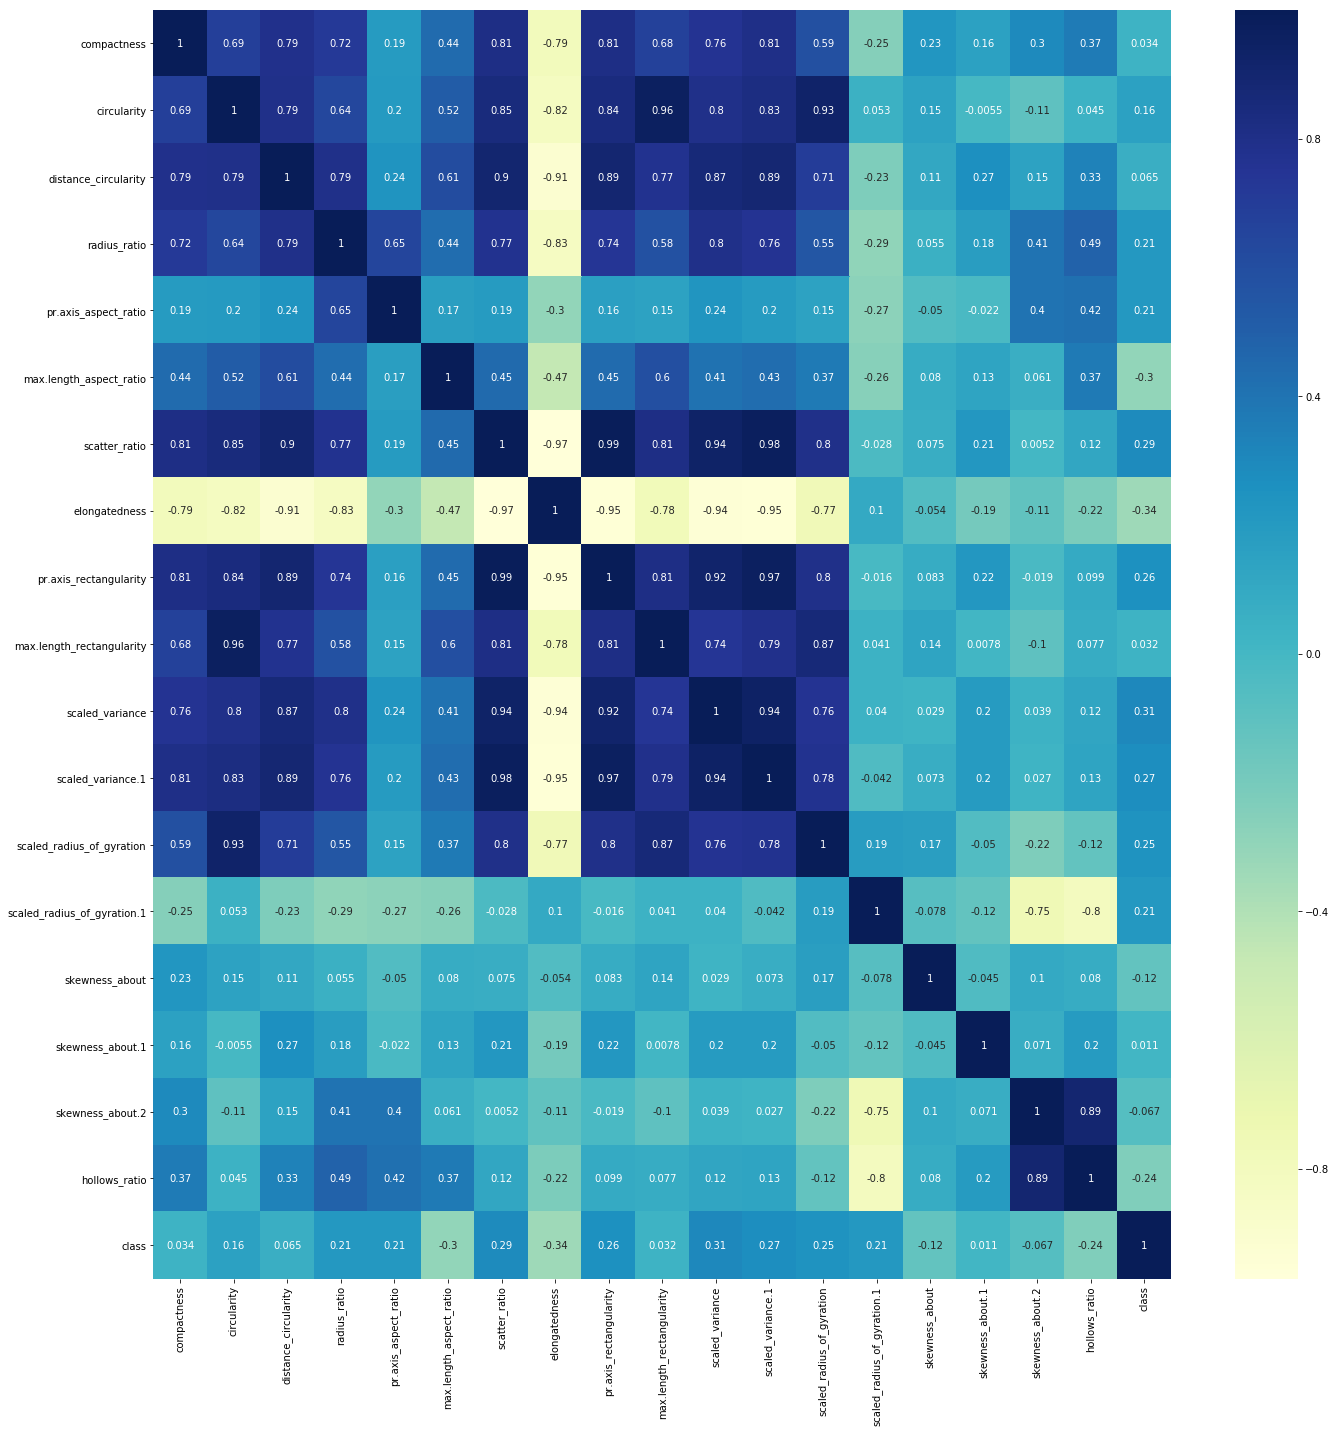

In [169]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot= True,cmap = 'YlGnBu')
plt.tight_layout()
plt.show()

- Relation of the compactness w.r.t class. Does not have any strong relation.

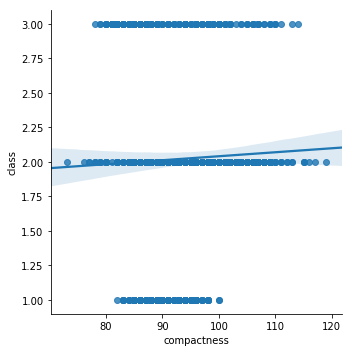

In [184]:
sns.lmplot(x = 'compactness', y = 'class', data = df )

In [170]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

- Relation of distance_circularity w.r.t class. Again not a good correlation among them.

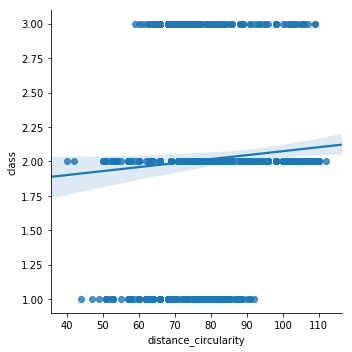

In [176]:
sns.lmplot(x = 'distance_circularity', y = 'class', data = df )

- Relation of the compactness w.r.t distance_circularity.  Both are correlated. Compactness for the care increase leads to increase in distance.

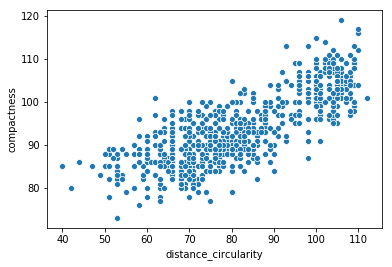

In [178]:
sns.scatterplot(x = 'distance_circularity', y = 'compactness', data = df ) 

- Relation between elongatedness and axis_rectangularity. With increase in elongatedness decrease in pr.axis rec visible.

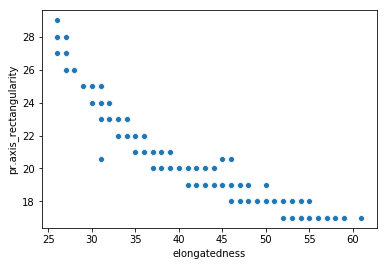

In [187]:
sns.scatterplot(x = 'elongatedness', y = 'pr.axis_rectangularity', data = df ) 

# Implementing PCA to determine the number of dimensions possible

In [321]:
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

In [322]:
X = df.drop(columns=['class'])
y = df['class']

In [323]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5 , random_state=0)

sc = StandardScaler()


X_train_std = sc.fit_transform(X_train)  # scale training and test data independently to prevent data leaks
X_test_std = sc.fit_transform(X_test)

In [196]:
cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00236967  0.68601704  0.79961906  0.7278959   0.26006733  0.44797386
   0.82099952 -0.79922887  0.81812647  0.68455966  0.73693796  0.8112635
   0.58871856 -0.25877282  0.23612588  0.19394697  0.30595377  0.37438368]
 [ 0.68601704  1.00236967  0.79857895  0.63850693  0.22497964  0.52834402
   0.85694044 -0.82782256  0.84862447  0.96305373  0.79233796  0.83080696
   0.93073527  0.05810357  0.14460192 -0.0130904  -0.12074575  0.02919743]
 [ 0.79961906  0.79857895  1.00236967  0.78934355  0.28331596  0.60111629
   0.91201115 -0.91659318  0.89913832  0.78258151  0.85954838  0.88916627
   0.7167504  -0.20929872  0.14459353  0.24446858  0.13022722  0.31227997]
 [ 0.7278959   0.63850693  0.78934355  1.00236967  0.67460596  0.42341957
   0.77100673 -0.82568446  0.74368668  0.57491659  0.8209114   0.76310316
   0.56626839 -0.2144213   0.09164514  0.19062822  0.393521    0.46493113]
 [ 0.26006733  0.22497964  0.28331596  0.67460596  1.00236967  0.19889306
   0.24048379

In [197]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.27380358 -0.10752034  0.03752354  0.16107269  0.08191979  0.1970764
  -0.19235936 -0.14997985  0.80745273 -0.01766228  0.25457368  0.07818589
   0.18284934  0.03627646 -0.02429373 -0.14979164  0.00900194 -0.00110833]
 [-0.28806088  0.14611278  0.18538344 -0.07426939 -0.07872799 -0.00452551
   0.35366613 -0.21862745 -0.03535112  0.1191403  -0.02888171  0.22939104
   0.00127081 -0.16126826 -0.04425388 -0.09067556 -0.56668528 -0.50047227]
 [-0.30273036 -0.03977814 -0.02259237  0.10294133 -0.10569609 -0.00690854
  -0.08690422  0.21454074 -0.16833799 -0.6236999  -0.08166115  0.25324259
   0.50130217  0.03209577 -0.00416356  0.29556702 -0.02551762 -0.0486136 ]
 [-0.27079872 -0.18001655 -0.13046143 -0.23000931  0.19135896 -0.16126519
  -0.16595678 -0.02737227 -0.08359513 -0.22634305  0.3092122   0.36759114
  -0.58323627 -0.14096474 -0.04097991  0.04631986  0.231195   -0.1647897 ]
 [-0.11509992 -0.26401428 -0.08327388 -0.58847863  0.24678009 -0.475297
   0.20941125  0.21

In [198]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


0         1         2         3         4         5        6   \
0  9.727338  3.151661  1.165284  1.113617  0.898495  0.685103  0.34803   

         7         8         9         10        11        12        13  \
0  0.284203  0.223177  0.099498  0.086016  0.081022  0.056241  0.048133   

         14        15        16        17  
0  0.004274  0.030912  0.022064  0.017585

In [199]:
print(eig_vecs[1])

[-0.28806088  0.14611278  0.18538344 -0.07426939 -0.07872799 -0.00452551
  0.35366613 -0.21862745 -0.03535112  0.1191403  -0.02888171  0.22939104
  0.00127081 -0.16126826 -0.04425388 -0.09067556 -0.56668528 -0.50047227]


In [200]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 53.91300962  71.38084629  77.83933971  84.01147313  88.9913135
  92.78844487  94.71737519  96.29254577  97.52948774  98.08094848
  98.55768651  99.00674194  99.31845604  99.58523211  99.75656149
  99.87884955  99.97631216 100.        ]


<Figure size 720x360 with 0 Axes>

<BarContainer object of 18 artists>

Text(0, 0.5, 'Explained Variance Ratio')

Text(0.5, 0, 'Principal Components')

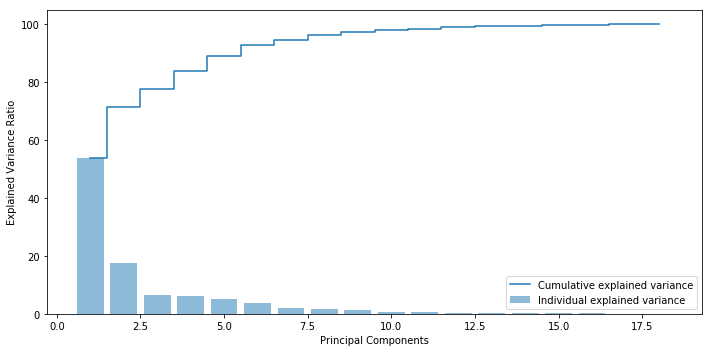

In [201]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# OBSERVATIONS

 - There are 11 PC Components which cover more then 95% variance from our PCA Analysis and 2 PC components are very close to 95% i.e 94.8% hence we are taking in account them also.
 - We will now user 11 PC Components in our Model Building
 
 
# Next steps
 
 
 - Create the pipeline
 - Use PCA, SVM 
 - Prediction, score and classification report from Validation set
 - Implement RandomCV and Best Paramaters with score
 

In [239]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [248]:
pipeline = Pipeline([('sc', StandardScaler()), ('pc', PCA(13)), ('sv', SVC())])

In [249]:
X = df.drop(columns=['class'])
y = df['class']

# Splitting the Dataset into 60% Training, 20% Validation , 20% Test Set. 

- When we are sure which algortihm is providing the best scores we will implement RandomCV/GridCV to find the best params and will use only Train Test to validate.


In [250]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = .20, random_state = 1234)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20, random_state = 1234)

In [252]:
pipeline.fit(X_train,y_train) # pipeline fit on training set. at this stage it will reduce the dimensions to PC-11.
pred = pipeline.predict(X_val)
print ('Score without Hyperparameter tuning {}' .format(pipeline.score(X_val,y_val) *100))
print ('\n')
print ((classification_report(y_val,pred)))
print ('\n')

print (confusion_matrix(y_val,pred))

Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pc', PCA(copy=True, iterated_power='auto', n_components=13, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('sv', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

Score without Hyperparameter tuning 95.88235294117648


              precision    recall  f1-score   support

           1       0.92      0.95      0.93        37
           2       0.97      0.97      0.97        91
           3       0.98      0.95      0.96        42

   micro avg       0.96      0.96      0.96       170
   macro avg       0.95      0.96      0.95       170
weighted avg       0.96      0.96      0.96       170



[[35  2  0]
 [ 2 88  1]
 [ 1  1 40]]


# OBSERVATIONS:

- SVC and PCA scored 95.8% w/o hyperparameter tuning. 
- After reducing the dimensions to 13, score is still same as would have been without Dimension Red hence we will stick to Dimension Reduction to increase the time and performance.
- Class level accuracys are also good where f1 score is 93%,97%,96%. There are still some FPs and FNs at class level let us see if we improve the class level accuracy by Parameter tuning.

- Implement RandomSearch

In [254]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20, random_state = 1234)

In [271]:
#Hyperparameter for SVC
param_grid_rv = {'sv__kernel':['linear', 'rbf', 'poly'],
                 'sv__gamma':[0.1, 1, 10, 100],
                 'sv__C':[0.1, 0.5, 0.5, 1, 2, 3, 4],
                 'sv__degree' : [0, 1, 2, 3, 4, 5, 6]
                }

- Random SearchCV using Hyperparameter then fit and score, predict. CV =10 means it will train on 9 and validate on 1 and iteratively doing that process

In [294]:
RandomSearch = RandomizedSearchCV(pipeline,param_grid_rv,cv = 10)
RandomSearch.fit(X_train,y_train)
print ("Best Parameter for RandomCV is {}".format(RandomSearch.best_estimator_))
pred = RandomSearch.predict(X_test)
print('\n')
print ('Score after Hyperparameter tuning {}' .format(RandomSearch.score(X_test,y_test) *100))

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pc', PCA(copy=True, iterated_power='auto', n_components=13, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('sv', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'sv__kernel': ['linear', 'rbf', 'poly'], 'sv__gamma': [0.1, 1, 10, 100], 'sv__C': [0.1, 0.5, 0.5, 1, 2, 3, 4], 'sv__degree': [0, 1, 2, 3, 4, 5, 6]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

Best Parameter for RandomCV is Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pc', PCA(copy=True, iterated_power='auto', n_components=13, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('sv', SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])


Score after Hyperparameter tuning 96.47058823529412


In [260]:
#Class Level Accuracy Report

In [274]:
print ((classification_report(y_test,pred)))
print ('\n')
print (confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95        37
           2       0.97      0.97      0.97        91
           3       0.98      0.98      0.98        42

   micro avg       0.96      0.96      0.96       170
   macro avg       0.96      0.96      0.96       170
weighted avg       0.96      0.96      0.96       170



[[35  2  0]
 [ 2 88  1]
 [ 0  1 41]]


# Conclusion:
- Post Cross Validation we can conclude that accuracy is improving and jumped to 96.4% overall.

- ALso the class level accuracy improved for class variable.